In [1]:
!apt-get update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"
import findspark
findspark.init()

spark-2.4.0-bin-hadoop2.7/
spark-2.4.0-bin-hadoop2.7/python/
spark-2.4.0-bin-hadoop2.7/python/setup.cfg
spark-2.4.0-bin-hadoop2.7/python/pyspark/
spark-2.4.0-bin-hadoop2.7/python/pyspark/resultiterable.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/python/
spark-2.4.0-bin-hadoop2.7/python/pyspark/python/pyspark/
spark-2.4.0-bin-hadoop2.7/python/pyspark/python/pyspark/shell.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/heapq3.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/join.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/version.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/rdd.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/java_gateway.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/find_spark_home.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/_globals.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/worker.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/accumulators.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/mllib/
spark-2.4.0-bin-hadoop2.7/python/pyspark/mllib/feature.py
spark-2.4.0-bin-hadoop2.7/python/pyspark

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
%cd '/content/gdrive/My Drive/LDS9_K273_ONLINE_BuiThiHuong/Chapter5/'

/content/gdrive/My Drive/LDS9_K273_ONLINE_BuiThiHuong/Chapter5


In [5]:
# import findspark
# findspark.init()

In [6]:
import pyspark

In [7]:
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import mean, stddev, col, log
from pyspark.sql.functions import to_date, dayofweek, to_timestamp
from pyspark.sql import types 
from pyspark.sql.functions import col, udf
from pyspark.sql.functions import *
import pyspark.sql.functions as F
from datetime import datetime
from pyspark.sql.types import DateType
from pyspark.sql.functions import year, month
from pyspark.sql.functions import dayofmonth, weekofyear
from pyspark.sql.functions import split, explode
from pyspark.sql.functions import coalesce, first, lit
from pyspark.ml.feature import Binarizer
from pyspark.ml.feature import Bucketizer
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.sql.functions import regexp_extract, col
from pyspark.sql.functions import datediff

In [9]:
sc =SparkContext()

In [10]:
spark = SparkSession(sc)

In [11]:
df = spark.read.csv("2017_StPaul_MN_Real_Estate.csv", header=True, inferSchema=True)

In [12]:
df.count()

5000

Create new features

In [13]:
df.columns

['No',
 'MLSID',
 'StreetNumberNumeric',
 'streetaddress',
 'STREETNAME',
 'PostalCode',
 'StateOrProvince',
 'City',
 'SalesClosePrice',
 'LISTDATE',
 'LISTPRICE',
 'LISTTYPE',
 'OriginalListPrice',
 'PricePerTSFT',
 'FOUNDATIONSIZE',
 'FENCE',
 'MapLetter',
 'LotSizeDimensions',
 'SchoolDistrictNumber',
 'DAYSONMARKET',
 'offmarketdate',
 'Fireplaces',
 'RoomArea4',
 'roomtype',
 'ROOF',
 'RoomFloor4',
 'PotentialShortSale',
 'PoolDescription',
 'PDOM',
 'GarageDescription',
 'SQFTABOVEGROUND',
 'Taxes',
 'RoomFloor1',
 'RoomArea1',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LivingArea',
 'UNITNUMBER',
 'YEARBUILT',
 'ZONING',
 'STYLE',
 'ACRES',
 'CoolingDescription',
 'APPLIANCES',
 'backonmarketdate',
 'ROOMFAMILYCHAR',
 'RoomArea3',
 'EXTERIOR',
 'RoomFloor3',
 'RoomFloor2',
 'RoomArea2',
 'DiningRoomDescription',
 'BASEMENT',
 'BathsFull',
 'BathsHalf',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'Class',
 'BATHSTOTAL',
 'BATHDESC',
 'RoomArea5',
 'RoomFloor5',
 'RoomArea6',
 'RoomFloor6',

In [14]:
# sum two columns
df = df.withColumn('TSQFT', (df['SQFTBELOWGROUND'] + df['SQFTABOVEGROUND']))
# devide two columns
df = df.withColumn('PRICEPERSQFT', (df['LISTPRICE']/df['TSQFT']))

In [15]:
df.select('TSQFT', 'PRICEPERSQFT').show(3)

+-----+------------------+
|TSQFT|      PRICEPERSQFT|
+-----+------------------+
|  980|142.75510204081633|
| 2228| 94.25493716337522|
| 1102| 204.1742286751361|
+-----+------------------+
only showing top 3 rows



In [16]:
acres_to_sqfeet = 43560
df = df.withColumn('LOT_SIZE_SQFT', df['ACRES']*acres_to_sqfeet)

In [17]:
df = df.withColumn('YARD_SIZE', df['LOT_SIZE_SQFT']-df['FOUNDATIONSIZE'])

In [18]:
df.corr('FOUNDATIONSIZE','SalesClosePrice')

0.6152231695664401

In [19]:
df.corr('YARD_SIZE','SalesClosePrice')

0.20714585430854263

In [20]:
# ratio BED_TO_BATHS


Regex

In [106]:
data = [('2345','Checked by John'),
        ('2398','Verified by Stacy'),
        ('2328','Verified by Srinivas than some random text'),
        ('3983','Double Checked on 2/23/17 by Marsha')]

In [107]:
df_r = sc.parallelize(data).toDF(['ID','Notes'])

In [108]:
df_r.show()

+----+--------------------+
|  ID|               Notes|
+----+--------------------+
|2345|     Checked by John|
|2398|   Verified by Stacy|
|2328|Verified by Srini...|
|3983|Double Checked on...|
+----+--------------------+



In [111]:
df_r = df_r.withColumn('Employee', regexp_extract(col('Notes'),'(.)(by)(\s+)(\w+)', 4))
# df_r = df_r.withColumn('Employee', regexp_extract(col('Notes'),'.by\s+(\w+)', 1))

In [112]:
df_r.show()

+----+--------------------+--------+
|  ID|               Notes|Employee|
+----+--------------------+--------+
|2345|     Checked by John|    John|
|2398|   Verified by Stacy|   Stacy|
|2328|Verified by Srini...|Srinivas|
|3983|Double Checked on...|  Marsha|
+----+--------------------+--------+



In [32]:
# convert to date type
func = udf(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M'), DateType())
df = df.withColumn('LISTDATE_new', func(col('LISTDATE')))

In [33]:
# get the day of the week
df = df.withColumn('List_Day_of_Week', dayofweek('LISTDATE_new'))

In [34]:
# sample and convert to pandas dataframe
sample_df = df.sample(False, 0.5, 42).toPandas()

In [35]:
sample_df[['LISTDATE','LISTDATE_new','List_Day_of_Week']].head(5)

,LISTDATE,LISTDATE_new,List_Day_of_Week
0,9/12/2017 0:00,2017-09-12,3
1,6/8/2017 0:00,2017-06-08,5
2,11/5/2017 0:00,2017-11-05,1
3,10/12/2017 0:00,2017-10-12,5
4,5/19/2017 0:00,2017-05-19,6


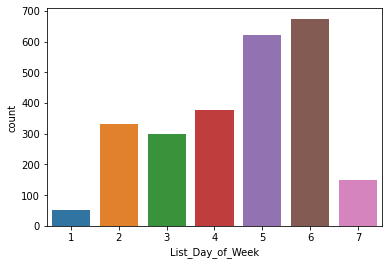

In [36]:
# plot count plot of day of week
ax = sns.countplot(x='List_Day_of_Week', data=sample_df)
plt.show()

text

In [38]:
has_attached_garage = df['GARAGEDESCRIPTION'].like('%Attached Garage%')
has_detached_garage = df['GARAGEDESCRIPTION'].like('%Detached Garage%')

In [39]:
df = df.withColumn('has_attached_garage',
                   (when(has_attached_garage,1)
                   .when(has_detached_garage,0)
                   .otherwise(None)))

In [40]:
df[['GARAGEDESCRIPTION','has_attached_garage']].show(truncate=50,n=3)

+--------------------------------------------------+-------------------+
|                                 GARAGEDESCRIPTION|has_attached_garage|
+--------------------------------------------------+-------------------+
|                                   Attached Garage|                  1|
|Attached Garage, Driveway - Asphalt, Garage Doo...|                  1|
|                                   Attached Garage|                  1|
+--------------------------------------------------+-------------------+
only showing top 3 rows



In [46]:
# split the column on commas into a list
split_col = split(df['ROOF'], ',')
# put the first value of the list into a new column
df = df.withColumn('Roof_Material', split_col.getItem(0))
# inspect results
df[['ROOF','Roof_Material']].show(5, truncate=100)

+----------------------------------------------+----------------+
|                                          ROOF|   Roof_Material|
+----------------------------------------------+----------------+
|                                          null|            null|
|Asphalt Shingles, Pitched, Age 8 Years or Less|Asphalt Shingles|
|                                          null|            null|
|Asphalt Shingles, Pitched, Age 8 Years or Less|Asphalt Shingles|
|            Asphalt Shingles, Age Over 8 Years|Asphalt Shingles|
+----------------------------------------------+----------------+
only showing top 5 rows



In [55]:
# convert string to list-like array
df = df.withColumn('roof_list', split(df['ROOF'], ', '))
df[['No','roof_list']].show(4, truncate=50)

# explode the values into new records
roof_df = df.withColumn('ex_roof_list', explode(df['roof_list']))

# inspect the values
roof_df[['No','ex_roof_list']].show(n=5, truncate=50)

+---+------------------------------------------------+
| No|                                       roof_list|
+---+------------------------------------------------+
|  1|                                            null|
|  2|[Asphalt Shingles, Pitched, Age 8 Years or Less]|
|  3|                                            null|
|  4|[Asphalt Shingles, Pitched, Age 8 Years or Less]|
+---+------------------------------------------------+
only showing top 4 rows

+---+-------------------+
| No|       ex_roof_list|
+---+-------------------+
|  2|   Asphalt Shingles|
|  2|            Pitched|
|  2|Age 8 Years or Less|
|  4|   Asphalt Shingles|
|  4|            Pitched|
+---+-------------------+
only showing top 5 rows



In [64]:
roof_df.select('ex_roof_list').distinct().show()

+-------------------+
|       ex_roof_list|
+-------------------+
|            Pitched|
|               Tile|
|              Metal|
|               Flat|
|      Wood Shingles|
|              Other|
|Age 8 Years or Less|
|             Shakes|
|             Rubber|
|   Asphalt Shingles|
|              Slate|
|   Age Over 8 Years|
|Unspecified Shingle|
|         Tar/Gravel|
+-------------------+



In [65]:
roof_df.select('ex_roof_list').distinct().count()

14

In [67]:
# create a dummy column of constant values
roof_df = roof_df.withColumn('constant_val', lit(1))

roof_df[['No','ex_roof_list','constant_val']].show(5)

+---+-------------------+------------+
| No|       ex_roof_list|constant_val|
+---+-------------------+------------+
|  2|   Asphalt Shingles|           1|
|  2|            Pitched|           1|
|  2|Age 8 Years or Less|           1|
|  4|   Asphalt Shingles|           1|
|  4|            Pitched|           1|
+---+-------------------+------------+
only showing top 5 rows



pivot

In [68]:
# pivot the values into bolean columns
roof_piv_df = roof_df.groupBy('No').pivot('ex_roof_list')\
                      .agg((first('constant_val')))

In [69]:
roof_piv_df.orderBy('No').show(5)

+---+-------------------+----------------+----------------+----+-----+-----+-------+------+------+-----+----------+----+-------------------+-------------+
| No|Age 8 Years or Less|Age Over 8 Years|Asphalt Shingles|Flat|Metal|Other|Pitched|Rubber|Shakes|Slate|Tar/Gravel|Tile|Unspecified Shingle|Wood Shingles|
+---+-------------------+----------------+----------------+----+-----+-----+-------+------+------+-----+----------+----+-------------------+-------------+
|  2|                  1|            null|               1|null| null| null|      1|  null|  null| null|      null|null|               null|         null|
|  4|                  1|            null|               1|null| null| null|      1|  null|  null| null|      null|null|               null|         null|
|  5|               null|               1|               1|null| null| null|   null|  null|  null| null|      null|null|               null|         null|
|  6|                  1|            null|               1|null| null|

In [73]:
len(roof_piv_df.columns)

15

join

In [77]:
# join the dataframes together and fill null
joined_data = df.join(roof_piv_df, on='No', how='left')

# columns to zero fill
zfill_cols = roof_piv_df.columns

# zero fill the pivoted values
zfilled_df = joined_data.fillna(0, subset=zfill_cols)

In [78]:
zfilled_df.show(3)

+---+-----+-------------------+--------------------+----------+----------+---------------+----------------+---------------+--------------+---------+---------------+-----------------+------------+--------------+-----+---------+-----------------+--------------------+------------+---------------+----------+---------+--------------------+--------------------+----------+------------------+---------------+----+--------------------+---------------+-----+----------+---------+------------------+-------+----------+----------+---------+------------------+--------------------+-----+------------------+--------------------+----------------+--------------+---------+------------+----------+----------+---------+---------------------+--------------------+---------+---------+-----------+-----------------+-----+----------+--------------------+---------+----------+---------+----------+---------+----------+---------+----------+--------+---------------+-----------------+--------------+-----------------+-----

Binarizing, Bucketing, Encoding

In [80]:
# cast the data type to double
df = df.withColumn('FIREPLACES', df['FIREPLACES'].cast('double'))
# create binarizing transformer
bin = Binarizer(threshold=0.0, inputCol='FIREPLACES', outputCol='FireplaceB')
# apply the transformer
df = bin.transform(df)

In [81]:
# inspect the results
df[['FIREPLACES','FireplaceB']].show(6)

+----------+----------+
|FIREPLACES|FireplaceB|
+----------+----------+
|       0.0|       0.0|
|       0.0|       0.0|
|       0.0|       0.0|
|       1.0|       1.0|
|       1.0|       1.0|
|       1.0|       1.0|
+----------+----------+
only showing top 6 rows



In [82]:
x = [(0,18.0),(1,19.0),(2,8.0),
     (3,5.0),(4,2.2),(5,4.0)]
d = spark.createDataFrame(x, ['id','hour'])
d.show()

+---+----+
| id|hour|
+---+----+
|  0|18.0|
|  1|19.0|
|  2| 8.0|
|  3| 5.0|
|  4| 2.2|
|  5| 4.0|
+---+----+



In [83]:
splits = [-float('inf'), 4, 8, float('inf')]
bucketizer = Bucketizer(splits=splits, inputCol='hour',
                        outputCol='result')
d = bucketizer.transform(d)
d.show()

+---+----+------+
| id|hour|result|
+---+----+------+
|  0|18.0|   2.0|
|  1|19.0|   2.0|
|  2| 8.0|   2.0|
|  3| 5.0|   1.0|
|  4| 2.2|   0.0|
|  5| 4.0|   1.0|
+---+----+------+



In [97]:
splits = [0,1,2,3,4, float('inf')]
buck = Bucketizer(splits=splits, inputCol='BATHSTOTAL',
                        outputCol='baths')
df = buck.transform(df)

IllegalArgumentException: ignored

In [98]:
df[['BATHSTOTAL','baths']].show(5)

+----------+-----+
|BATHSTOTAL|baths|
+----------+-----+
|         2|  2.0|
|         3|  3.0|
|         1|  1.0|
|         2|  2.0|
|         2|  2.0|
+----------+-----+
only showing top 5 rows



StringIndexer

In [100]:
df_i = spark.createDataFrame([
    ('a',2.0),
    ('c',1.0),
    ('b',2.0),
    ('a',1.0),
    ('a',0.0),
    ('c',1.0)
], ['categoryIndex','categoryIndex2'])
stringID = StringIndexer(inputCol='categoryIndex', outputCol='categoryIndex1', stringOrderType='alphabetAsc')
indexer = stringID.fit(df_i)
df_i = indexer.transform(df_i)
df_i.show()

+-------------+--------------+--------------+
|categoryIndex|categoryIndex2|categoryIndex1|
+-------------+--------------+--------------+
|            a|           2.0|           0.0|
|            c|           1.0|           2.0|
|            b|           2.0|           1.0|
|            a|           1.0|           0.0|
|            a|           0.0|           0.0|
|            c|           1.0|           2.0|
+-------------+--------------+--------------+



In [101]:
# create indexer transformer
stringIndexer = StringIndexer(inputCol='City', outputCol='City_Index')
# fit transformer
model = stringIndexer.fit(df)
# apply transformer
df = model.transform(df)

In [102]:
df[['City','City_Index']].show(5)

+----------------+----------+
|            City|City_Index|
+----------------+----------+
|LELM - Lake Elmo|       4.0|
|LELM - Lake Elmo|       4.0|
|LELM - Lake Elmo|       4.0|
|LELM - Lake Elmo|       4.0|
|LELM - Lake Elmo|       4.0|
+----------------+----------+
only showing top 5 rows



In [104]:
encoder_i = OneHotEncoder(inputCol='categoryIndex1',
                          outputCol='categoryVec1',
                          dropLast=False) # default=True
# encoded_i = encoder_i.fit(df_i)
encoded_i = encoder_i.transform(df_i)
encoded_i['categoryIndex','categoryIndex1','categoryVec1'].show()

# => Có 3 phần tử, vị trí phần tử, số lần xuất hiện

+-------------+--------------+-------------+
|categoryIndex|categoryIndex1| categoryVec1|
+-------------+--------------+-------------+
|            a|           0.0|(3,[0],[1.0])|
|            c|           2.0|(3,[2],[1.0])|
|            b|           1.0|(3,[1],[1.0])|
|            a|           0.0|(3,[0],[1.0])|
|            a|           0.0|(3,[0],[1.0])|
|            c|           2.0|(3,[2],[1.0])|
+-------------+--------------+-------------+



In [105]:
encoder_i = OneHotEncoder(inputCol='categoryIndex1',
                          outputCol='categoryVec1',
                          dropLast=True) 
# encoder_i = encoder_i.fit(df_i)
encoded_i = encoder_i.transform(df_i)
encoded_i['categoryIndex','categoryIndex1','categoryVec1'].show()

+-------------+--------------+-------------+
|categoryIndex|categoryIndex1| categoryVec1|
+-------------+--------------+-------------+
|            a|           0.0|(2,[0],[1.0])|
|            c|           2.0|    (2,[],[])|
|            b|           1.0|(2,[1],[1.0])|
|            a|           0.0|(2,[0],[1.0])|
|            a|           0.0|(2,[0],[1.0])|
|            c|           2.0|    (2,[],[])|
+-------------+--------------+-------------+



In [113]:
# create endoer transformer
encoder = OneHotEncoder(inputCol='City_Index',
                        outputCol='City_Vec')
# apply the encoder transformer
# encoder = encoder.fit(df)
df = encoder.transform(df)
# inspect results
df[['City_Index','City_Vec']].show(5)

+----------+---------+
|City_Index| City_Vec|
+----------+---------+
|       4.0|(4,[],[])|
|       4.0|(4,[],[])|
|       4.0|(4,[],[])|
|       4.0|(4,[],[])|
|       4.0|(4,[],[])|
+----------+---------+
only showing top 5 rows



CACHE

In [114]:
df.cache().count()
# => dataframe su dung nhieu

5000

In [115]:
# df is cache?
df.is_cached

True

In [116]:
# remove df from the cache
df.unpersist()

DataFrame[No: int, MLSID: string, StreetNumberNumeric: int, streetaddress: string, STREETNAME: string, PostalCode: int, StateOrProvince: string, City: string, SalesClosePrice: int, LISTDATE: string, LISTPRICE: int, LISTTYPE: string, OriginalListPrice: int, PricePerTSFT: double, FOUNDATIONSIZE: int, FENCE: string, MapLetter: string, LotSizeDimensions: string, SchoolDistrictNumber: string, DAYSONMARKET: int, offmarketdate: string, FIREPLACES: double, RoomArea4: string, roomtype: string, ROOF: string, RoomFloor4: string, PotentialShortSale: string, PoolDescription: string, PDOM: int, GarageDescription: string, SQFTABOVEGROUND: int, Taxes: int, RoomFloor1: string, RoomArea1: string, TAXWITHASSESSMENTS: double, TAXYEAR: int, LivingArea: int, UNITNUMBER: string, YEARBUILT: int, ZONING: string, STYLE: string, ACRES: double, CoolingDescription: string, APPLIANCES: string, backonmarketdate: string, ROOMFAMILYCHAR: string, RoomArea3: string, EXTERIOR: string, RoomFloor3: string, RoomFloor2: stri

In [117]:
# check caches status again
df.is_cached

False

Parquet
(lưu trữ)

In [118]:
# save df to parquet format
df.write.parquet('Real_Estate.parquet', mode='overwrite')

In [119]:
# read parquet file into new dataframe
df_new = spark.read.parquet('Real_Estate.parquet')

In [120]:
df_new.count()

5000